In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('immo_dataset.csv')
df.head()

,Unnamed: 0,Area [m²],Price [€],state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,locality [zip code],surface of the land [m²],terrace,terrace surface [m²],swimming pool,type of property,subtype of property,garden,garden surface [m²]
0,0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,0,0,NaN,house,house,1,350
1,3,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,0,0,NaN,house,villa,0,0
2,4,234.0,499000,as new,NaN,5.0,NaN,NaN,NaN,8800,744.0,0,0,NaN,house,villa,0,0
3,5,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,0,0,NaN,house,house,0,0
4,6,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,0,0,NaN,house,villa,1,90


In [3]:
# deleting the "Unnamed: 0" column from the dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area [m²],Price [€],state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,locality [zip code],surface of the land [m²],terrace,terrace surface [m²],swimming pool,type of property,subtype of property,garden,garden surface [m²]
0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,0,0,NaN,house,house,1,350
1,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,0,0,NaN,house,villa,0,0
2,234.0,499000,as new,NaN,5.0,NaN,NaN,NaN,8800,744.0,0,0,NaN,house,villa,0,0
3,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,0,0,NaN,house,house,0,0
4,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,0,0,NaN,house,villa,1,90


In [4]:
# Renaming columns
df.columns = ['area','price','building_status','number_facades','number_bedrooms','kitchen_equipped','furnished','open_fire','zip_code','land_surface','terrace','terrace_surface','swimming_pool','property_type','property_subtype','garden','garden_surface']
df.head()

,area,price,building_status,number_facades,number_bedrooms,kitchen_equipped,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,property_type,property_subtype,garden,garden_surface
0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,0,0,NaN,house,house,1,350
1,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,0,0,NaN,house,villa,0,0
2,234.0,499000,as new,NaN,5.0,NaN,NaN,NaN,8800,744.0,0,0,NaN,house,villa,0,0
3,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,0,0,NaN,house,house,0,0
4,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,0,0,NaN,house,villa,1,90


In [5]:
# Checking the columns type
df.dtypes

area                float64
price                object
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surface        float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
property_subtype     object
garden                int64
garden_surface        int64
dtype: object

In [6]:
# Changing price type from object (string) to float
# price has either string 'number' where number is an integer or string 'no'
# so float('no') will raise an error because no is not a number. 
# For this reason, we need to replace first 'no' by 'NaN' or 'np.nan'
df.replace({'no':np.nan}, inplace=True)
df["price"] = pd.to_numeric(df["price"])
df.dtypes

area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surface        float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
property_subtype     object
garden                int64
garden_surface        int64
dtype: object

In [7]:
df.isna().sum()

area                1736
price                 34
building_status     3116
number_facades      2338
number_bedrooms      152
kitchen_equipped    3423
furnished           9961
open_fire           9346
zip_code               0
land_surface           0
terrace                0
terrace_surface        0
swimming_pool       9692
property_type          0
property_subtype       0
garden                 0
garden_surface         0
dtype: int64

### Percentage of missing values per column ?

In [8]:
# percentage of missing values in each column
df.isna().sum()*100/len(df)

area                17.201744
price                0.336901
building_status     30.875941
number_facades      23.166865
number_bedrooms      1.506143
kitchen_equipped    33.917955
furnished           98.701942
open_fire           92.608006
zip_code             0.000000
land_surface         0.000000
terrace              0.000000
terrace_surface      0.000000
swimming_pool       96.036465
property_type        0.000000
property_subtype     0.000000
garden               0.000000
garden_surface       0.000000
dtype: float64

### Deleting null values
Since price is the target variable, so rows without price are not relevant. We'll delete rows without area as well

In [9]:
df.dropna(subset=['area','price'], inplace=True)
df.shape

(8333, 17)

In [10]:
# adding a new column province
conditions = [ (1000 <= df['zip_code']) & (df['zip_code'] < 1300),
              (1300 <= df['zip_code']) & (df['zip_code'] < 1500),
              ((1500 <= df['zip_code']) & (df['zip_code'] < 2000))| 
              ((3000 <= df['zip_code']) & (df['zip_code'] < 3500)),
              (2000 <= df['zip_code']) & (df['zip_code'] < 3000),
              (3500 <= df['zip_code']) & (df['zip_code'] < 4000),
              (4000 <= df['zip_code']) & (df['zip_code'] < 5000),
              (5000 <= df['zip_code']) & (df['zip_code'] < 6000),
              (6600 <= df['zip_code']) & (df['zip_code'] < 7000),
              ((6000 <= df['zip_code']) & (df['zip_code'] < 6600))|
              ((7000 <= df['zip_code']) & (df['zip_code'] < 8000)),
              (8000 <= df['zip_code']) & (df['zip_code'] < 9000),
              (9000 <= df['zip_code']) & (df['zip_code'] < 10000)]
values = ['Brussel-Capital', 'Walloon Brabant','Flemish Brabant','Antwerp','Limburg','Liege','Namur','Luxembourg','Hainaut','West Flanders','East Flanders']
df['province'] = np.select(conditions, values)
df.head()

,area,price,building_status,number_facades,number_bedrooms,kitchen_equipped,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,property_type,property_subtype,garden,garden_surface,province
0,123.0,200000.0,good,3.0,2.0,installed,NaN,NaN,3294,429.0,0,0,NaN,house,house,1,350,Flemish Brabant
1,255.0,698000.0,just renovated,4.0,4.0,installed,NaN,NaN,2070,1210.0,0,0,NaN,house,villa,0,0,Antwerp
2,234.0,499000.0,as new,NaN,5.0,NaN,NaN,NaN,8800,744.0,0,0,NaN,house,villa,0,0,West Flanders
3,219.0,717000.0,as new,NaN,4.0,NaN,NaN,NaN,8000,760.0,0,0,NaN,house,house,0,0,West Flanders
4,156.0,429000.0,good,4.0,4.0,installed,NaN,NaN,8800,419.0,0,0,NaN,house,villa,1,90,West Flanders


In [11]:
df.province.value_counts()

West Flanders      1540
East Flanders      1357
Hainaut             985
Liege               943
Flemish Brabant     862
Antwerp             695
Walloon Brabant     617
Brussel-Capital     584
Luxembourg          318
Namur               270
Limburg             162
Name: province, dtype: int64

### How many qualitative and quantitative variables are there ? 

In [12]:
quantitative_variables = ['area','price','number_facades','number_bedrooms','zip_code','land_surface','terrace_surface','garden_surface']
len(quantitative_variables)

8

In [13]:
qualitative_variables = ['building_status','kitchen_equipped','furnished','open_fire','terrace','swimming_pool','property_type','property_subtype','garden']
len(qualitative_variables)

9

### How would you transform these values into numerical values ?

In [14]:
df2 = df
df2['building_status'] =df2['building_status'].astype('category').cat.codes
df2['kitchen_equipped'] =df2['kitchen_equipped'].astype('category').cat.codes
df2['furnished'] =df2['furnished'].astype('category').cat.codes
df2['open_fire'] =df2['open_fire'].astype('category').cat.codes
df2['property_type'] =df2['property_type'].astype('category').cat.codes
df2['property_subtype'] =df2['property_subtype'].astype('category').cat.codes

### What is the correlation between the variables and the target ?

In [15]:
# check correlation transforming categorical variables
df.corr(method ='pearson')[1:2]

,area,price,building_status,number_facades,number_bedrooms,kitchen_equipped,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,property_type,property_subtype,garden,garden_surface
price,0.537828,1.0,-0.079637,0.245039,0.426205,-0.031317,0.022054,0.152028,-0.255526,0.224538,0.061152,0.021336,NaN,0.127673,0.041493,0.050399


In [16]:
df.corr(method ='pearson')[1:2].apply('abs').max(axis=1)

price    1.0
dtype: float64

In [17]:
# check after transforming categorical variables
df2.corr(method ='pearson')[1:2]

,area,price,building_status,number_facades,number_bedrooms,kitchen_equipped,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,property_type,property_subtype,garden,garden_surface
price,0.537828,1.0,-0.079637,0.245039,0.426205,-0.031317,0.022054,0.152028,-0.255526,0.224538,0.061152,0.021336,NaN,0.127673,0.041493,0.050399


### Plots

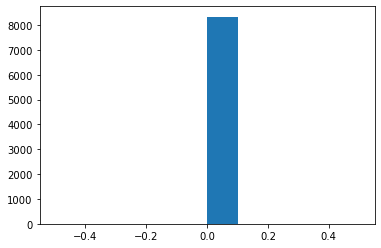

In [30]:
plt.hist(x='property_type',data=df)
plt.show()

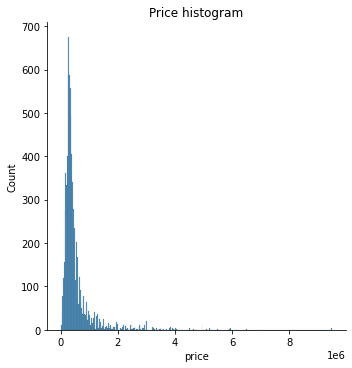

In [19]:
sns.displot(data=df, x='price')
plt.title('Price histogram');

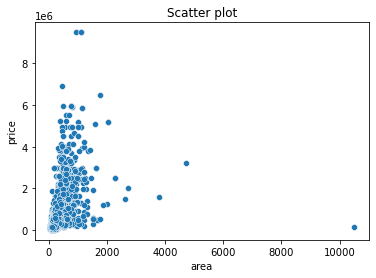

In [20]:
sns.scatterplot(data=df, x='area',y='price')
plt.title('Scatter plot');

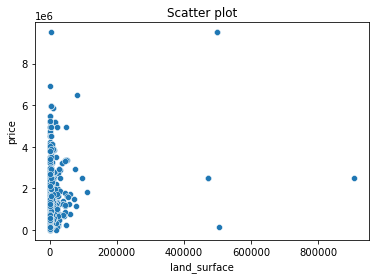

In [21]:
sns.scatterplot(data=df, x='land_surface',y='price')
plt.title('Scatter plot');

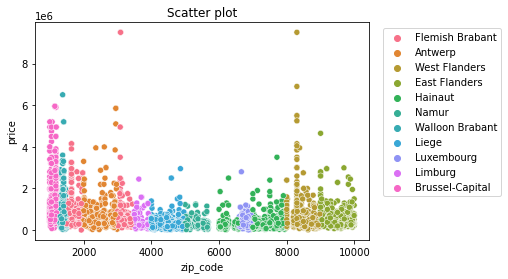

In [22]:
sns.scatterplot(data=df, x='zip_code',y='price', hue='province')
plt.legend(loc=(1.04,0.2))
plt.title('Scatter plot');

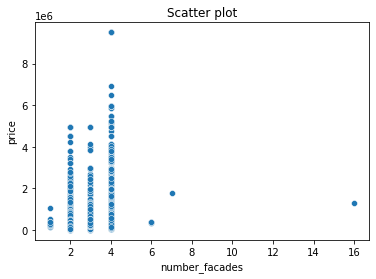

In [23]:
sns.scatterplot(data=df, x='number_facades',y='price')
plt.title('Scatter plot');

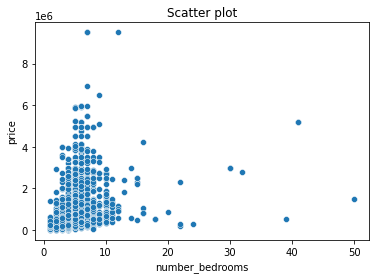

In [24]:
sns.scatterplot(data=df, x='number_bedrooms',y='price')
plt.title('Scatter plot');

### Average price, median price, price per square meter

In [25]:
avg_price = df.groupby('province')['price'].mean()
print(avg_price);

province
Antwerp            5.548010e+05
Brussel-Capital    1.340633e+06
East Flanders      4.223645e+05
Flemish Brabant    6.987043e+05
Hainaut            2.844033e+05
Liege              2.809466e+05
Limburg            4.126059e+05
Luxembourg         3.716410e+05
Namur              3.048474e+05
Walloon Brabant    6.923937e+05
West Flanders      4.690415e+05
Name: price, dtype: float64


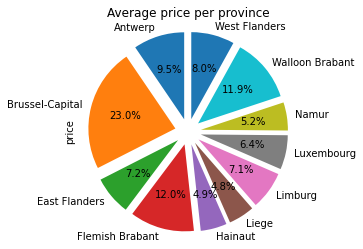

In [26]:
avg_price.plot.pie(y='province',
           startangle=90,
           title=('Average price per province'),
           explode=(0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15),
           autopct='%1.1f%%')
plt.show();

In [27]:
mdn_price = df.groupby('province')['price'].median()
print(mdn_price);

province
Antwerp            389000.0
Brussel-Capital    865000.0
East Flanders      344500.0
Flemish Brabant    445000.0
Hainaut            220000.0
Liege              239000.0
Limburg            320644.0
Luxembourg         309000.0
Namur              270000.0
Walloon Brabant    470000.0
West Flanders      300000.0
Name: price, dtype: float64


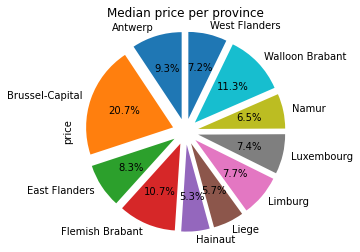

In [28]:
mdn_price.plot.pie(y='province',
           title=('Median price per province'),
           startangle=90,
           explode=(0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15),
           autopct='%1.1f%%')
plt.show()

In [31]:
df.property_subtype.value_counts()

7     6006
13    1061
10     271
0      259
5      235
9      176
12      92
4       88
1       60
6       28
8       22
2       15
3       13
11       7
Name: property_subtype, dtype: int64

In [32]:
df.building_status.value_counts()

 1    2199
-1    2138
 0    2070
 4     767
 3     743
 2     377
 5      39
Name: building_status, dtype: int64